# ART Boundary Attack

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import sys
#!{sys.executable} -m pip install git+https://github.com/nottombrown/imagenet_stubs
sys.path.append("..")

%matplotlib inline

import imagenet_stubs
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from matplotlib import pyplot as plt
from IPython.display import clear_output

from art.classifiers import KerasClassifier
from art.attacks import BoundaryAttack
from art.utils import to_categorical

Using TensorFlow backend.


# Model Definition

In [2]:
mean_imagenet = np.zeros([224, 224,3])
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)
model = ResNet50(weights='imagenet')
classifier = KerasClassifier(clip_values=(0, 255), model=model, preprocessing=(mean_imagenet, 1))

# Get Target and Init Images

Target image is:  105


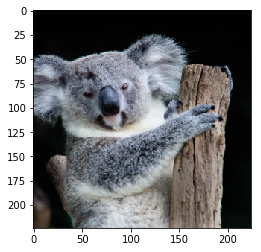

Init image is:  866


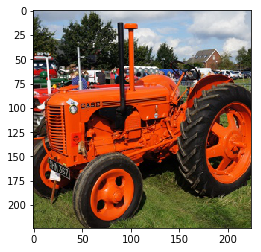

In [3]:
target_image_name = 'koala.jpg'
init_image_name = 'tractor.jpg'
for image_path in imagenet_stubs.get_image_paths():
    if image_path.endswith(target_image_name):
        target_image = image.load_img(image_path, target_size=(224, 224))
        target_image = image.img_to_array(target_image)
    if image_path.endswith(init_image_name):
        init_image = image.load_img(image_path, target_size=(224, 224))
        init_image = image.img_to_array(init_image)

print("Target image is: ", np.argmax(classifier.predict(np.array([target_image]))[0]))
plt.imshow(target_image.astype(np.uint))
plt.show()
print("Init image is: ", np.argmax(classifier.predict(np.array([init_image]))[0]))
plt.imshow(init_image.astype(np.uint))
plt.show()

# Boundary Targeted Attack

Adversarial image at step 0:


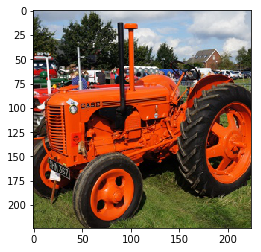

Adversarial image at step 500:


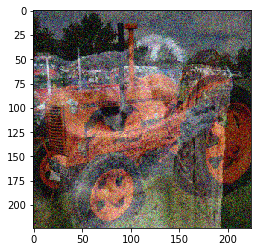

Adversarial image at step 1000:


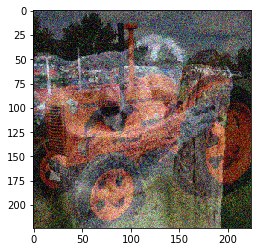

Adversarial image at step 1500:


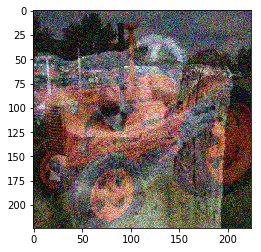

Adversarial image at step 2000:


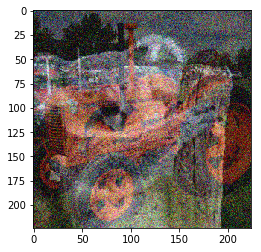

Adversarial image at step 2500:


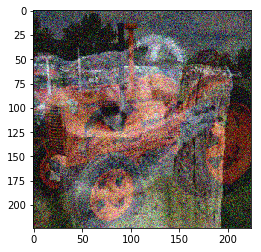

Adversarial image at step 3000:


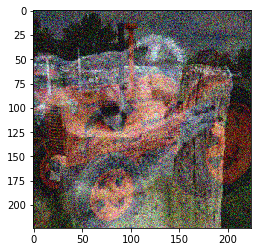

Adversarial image at step 3500:


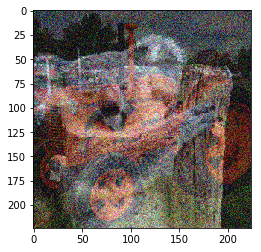

Adversarial image at step 4000:


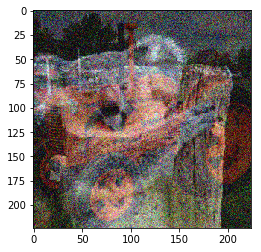

Adversarial image at step 4500:


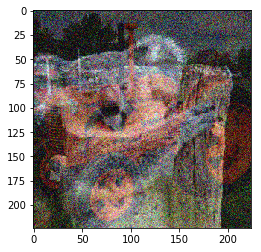

In [ ]:
attack = BoundaryAttack(classifier=classifier, targeted=True, max_iter=0, num_trial=20, sample_size=20, delta=0.1, step_adapt=0.9, epsilon=0.1)
attack.init_image = init_image

for i in range(20):
    x_adv = attack.generate(np.array([target_image]), y=to_categorical([866], 1000))

    #clear_output()
    print("Adversarial image at step %d:" % (i * 500))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)
    
    attack.max_iter = 500
    attack.init_image = x_adv[0]
    attack.delta = attack.curr_delta
    attack.epsilon = attack.curr_epsilon

# Boundary Untargeted Attack

In [ ]:
attack = BoundaryAttack(classifier=classifier, targeted=False, max_iter=0, num_trial=20, sample_size=20, delta=0.1, step_adapt=0.9, epsilon=0.1)

In [ ]:
for i in range(20):
    x_adv = attack.generate(np.array([target_image]))

    clear_output()
    print("Adversarial image at step %d:" % (i * 10))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)
    
    attack.max_iter = 10
    attack.init_image = x_adv[0]
    attack.delta = attack.curr_delta
    attack.epsilon = attack.curr_epsilon

# Evaluation